# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### **Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### **Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1) Do the users spend more time on the new landing page than on the existing landing page?

2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3) Does the converted status depend on the preferred language?

4) Is the time spent on the new page the same for the different language users?

### **Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* **user_id** - Unique user ID of the person visiting the website
* **group** - Whether the user belongs to the first group (control) or the second group (treatment)
* **landing_page** - Whether the landing page is new or old
* **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page
* **converted** - Whether the user gets converted to a subscriber of the news portal or not
* **language_preferred** - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Viewing the first and last few rows of the dataset

In [3]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Observations: The dataframe has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to user interactions for the landing pages.

### Checking the shape of the data.

In [5]:
# Let's look at the shape of the dataset
rows = df.shape[0]
cols = df.shape[1]
print(f'Number of rows: {rows}\nNumber of columns: {cols}')

Number of rows: 100
Number of columns: 6


Observations: There are 100 rows and 6 columns within the dataframe

In [6]:
# Let's print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
* There are 2 numerical columns (1 integer and 1 float datatype) and 4 object-datatype columns within the dataset.
* The 'user_id' column is read as an integer datatype but has no numerical implications being that it's a unique identifier.

### Getting the statistical summary of the variables.

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
* Time spent on landing page ranges from 0.19 to 10.71 minutes, with an average time of 5.38 minutes.
* 54 users subscribed to the newsletter.
* Most users (34) from the sample prefer spanish language than other languages.

### Checking for missing values and duplicates

In [8]:
# Let's check for missing values.
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observations: There are no missing values

In [9]:
# Let's check for duplicates.
df.duplicated().sum()

0

Observations: There are no duplicates

### **Univariate Analysis**

***Let's assess the distribution of the numerical columns.***

Note: We do not need to analyze the user_id column as it is uniquely assigned, and do not have any impact on the patterns or relationships between other variables in the dataframe.

**Time spent on landing page**

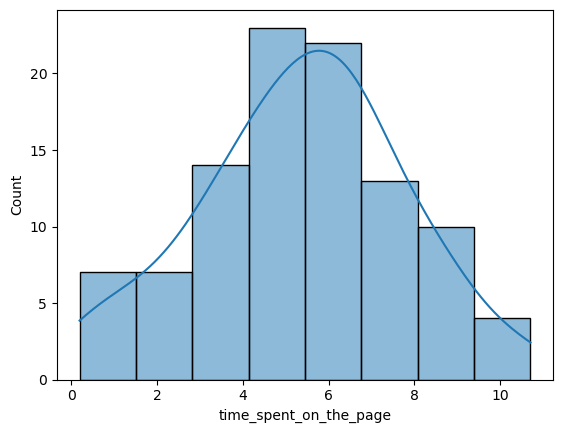

In [10]:
# Histogram showing the distribution of time spent on landing page
sns.histplot(data=df, x='time_spent_on_the_page', kde=True);
plt.show()

# sns.histplot(data=df, x='time_spent_on_the_page', hue='converted', kde=True);
# plt.show()

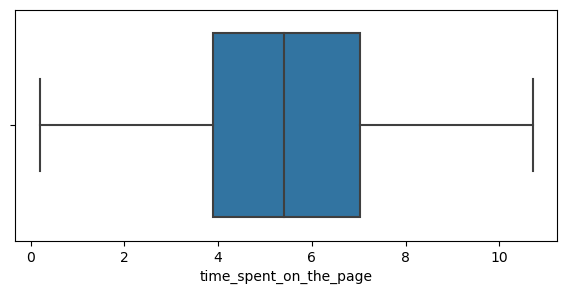

In [11]:
# Box-plot showing the distribution of of time spent on landing page
plt.figure(figsize = (7,3))
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

Observation: The distribution is approximately normal for the time spent on the landing page

**Landing Page**

old    50
new    50
Name: landing_page, dtype: int64


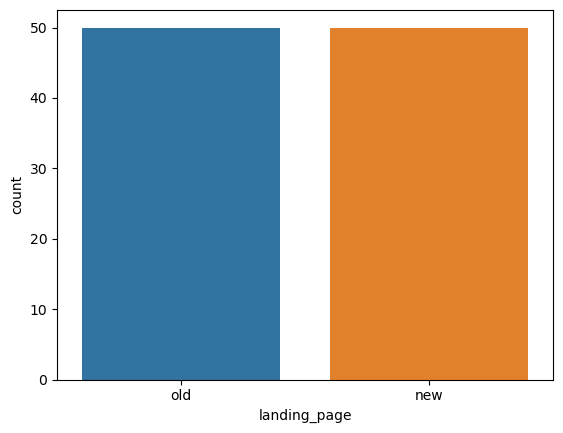

In [12]:
# Let's see the number of users on the old and new landing pages
print(df['landing_page'].value_counts())

sns.countplot(data=df,x='landing_page');
plt.show()

Observation: 50 users each browse through the old and new landing pages

**Preferred Language**

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


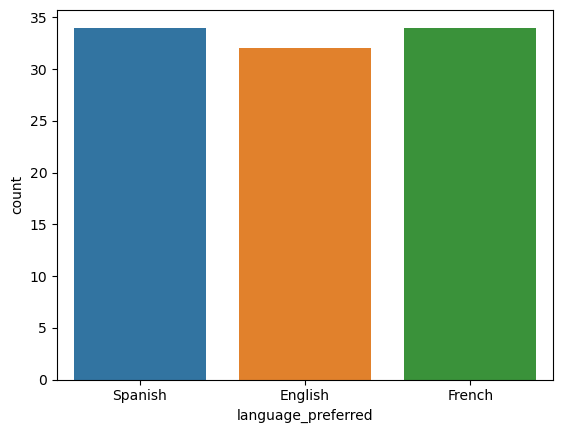

In [13]:
# Let's see the distribution of languages preferred by users
print(df['language_preferred'].value_counts())

sns.countplot(data=df,x='language_preferred');
plt.show()

Observation: Both French and Spanish languages are most preferred by users in the sample data

**Converted Users**

yes    54
no     46
Name: converted, dtype: int64


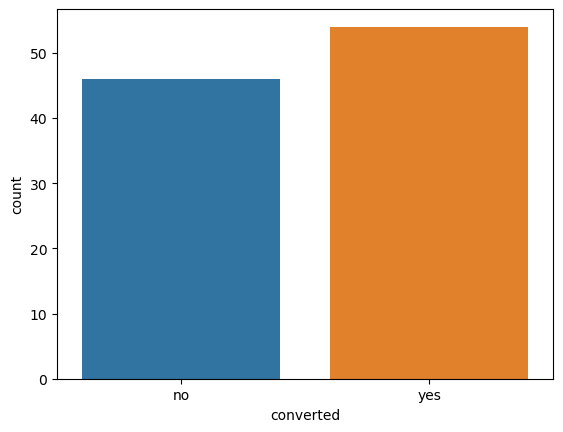

In [14]:
# Let's see the number of users who converted
print(df['converted'].value_counts())

sns.countplot(data=df,x='converted');
plt.show()

Observation: 54 users subscribed while the remaining 46 maintained the status quo

**Groupings**

control      50
treatment    50
Name: group, dtype: int64


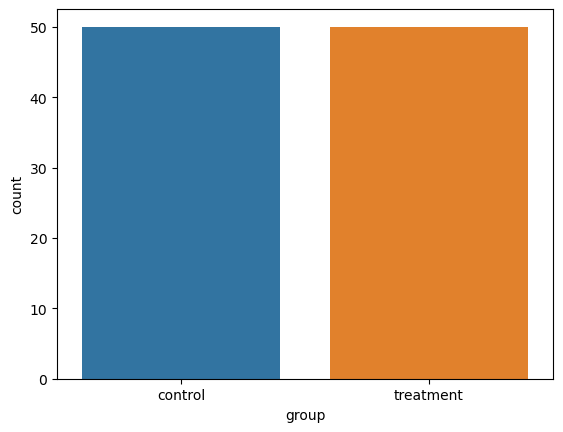

In [15]:
# Let's see the number of users in the control and treatment groups
print(df['group'].value_counts())

sns.countplot(data=df,x='group');
plt.show()

Observation: 50 users each belong to the treatment and control group as planned by the design team

### Bivariate Analysis

**Time spent vs Converted**

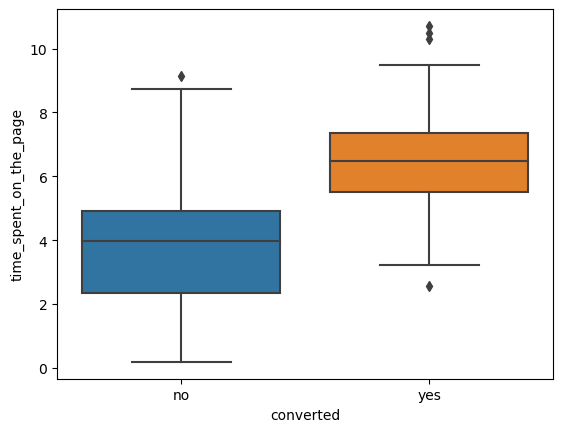

In [16]:
# Box plot for time spent on landing page (Converted vs Not Converted Users)
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page');
plt.show()

**Time spent vs landing page**

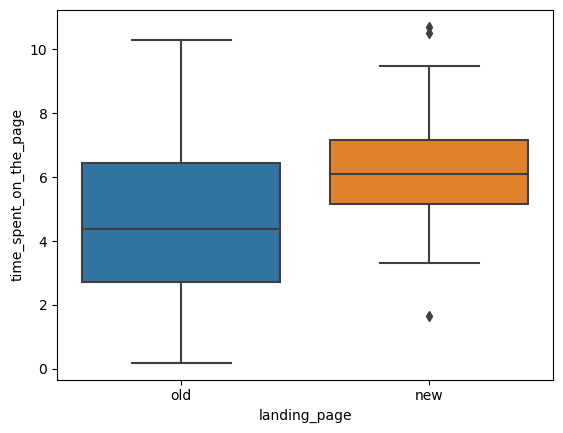

In [17]:
# Box plot for time spent on landing page (Old vs New landing pages)
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');
plt.show()

**Time spent vs Preferred Languages**

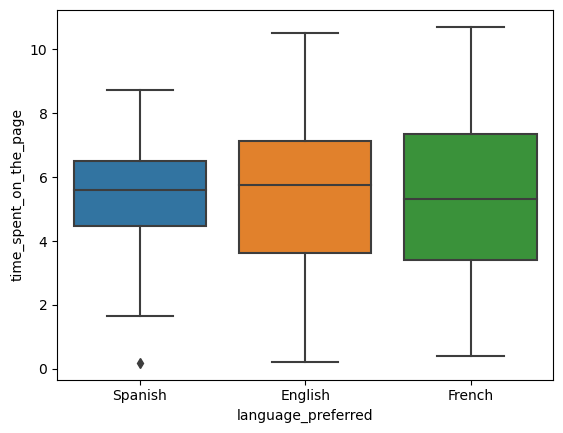

In [18]:
# Box plot for time spent on landing page (Preferred languages)
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page');
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

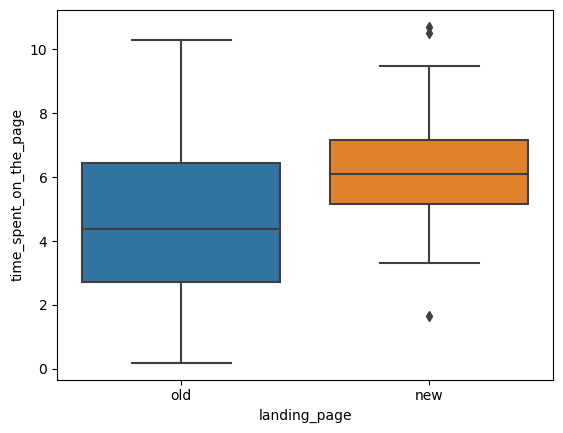

In [19]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');
plt.show()

Observations: 
* Users spend more time on the new landing page than the existing landing page.
* Outliers are present for users browsing the new landing page.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

Where $\mu_1, \mu_2$ are mean times spent by users on the new and old pages respectively


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we select the ***2-sample independent T-test for equality of means***.

The assumptions for the T-test in this scenario are as follows:

* **Continuous Data**: The data is continuous since the time spent on the landing page is measured on a continuous scale.
* **Normally Distributed Populations**: The populations are normally distributed.
* **Independent Populations**: The samples come from two independent populations because users for both groups were randomly selected.
* **Unequal Population Standard Deviations**: The sample standard deviations are not the same (which will be shown in step 4), leading us to assume that the population standard deviations are also different.
* **Random Sampling from population**: Users were chosen randomly for the survey.

Based on these points, the assumptions for the T-test are met in this case.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [20]:
# Data for users on the new landing page
new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Data for users on the old landing page
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print('Standard deviation for time on new page:', round(new_page_time.std(), 2))
print('Standard deviation for time on old page:', round(old_page_time.std(), 2))

Standard deviation for time on new page: 1.82
Standard deviation for time on old page: 2.58


Observation: Based on the sample standard deviations of the two groups, the population standard deviations are unequal

### Step 5: Calculate the p-value

In [21]:
from scipy.stats import ttest_ind

# Perform an independent t-test
t_stat, p_value = ttest_ind(new_page_time, old_page_time, equal_var=False, alternative='greater')

print("The p-value is:", round(p_value,4))

The p-value is: 0.0001


### Step 6: Compare the p-value with $\alpha$

In [22]:
alpha = 0.05
alpha_sign = "\u03B1"  # Unicode for alpha

if p_value < alpha:
    print(f"The p-value is less than {alpha_sign}. Hence we reject the null hypothesis.")
else:
    print(f"The p-value is greater than or equal to {alpha_sign}. Hence we fail to reject the null hypothesis.")


The p-value is less than α. Hence we reject the null hypothesis.


### Step 7:  Draw inference

Given that the p-value is below 0.05, we dismiss the null hypothesis. This provides substantial statistical evidence indicating that users spend more time on the new landing page compared to the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Let's perform visual analysis

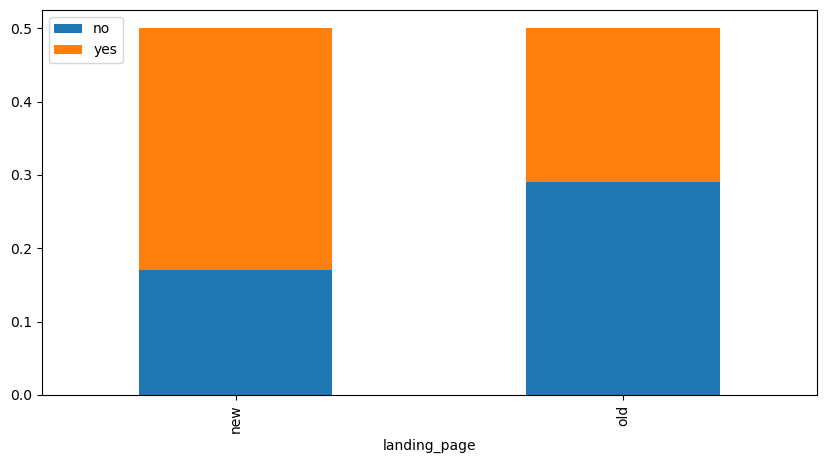

In [23]:
# Constructing contingency table
ax = pd.crosstab(df['landing_page'], df['converted'], normalize=True).plot(kind='bar', figsize=(10, 5), stacked=True)
ax.legend(loc='upper left')
plt.show()


Findings:

* A higher proportion of users who view the new landing page end up subscribing compared to those who view the old landing page.

* This suggests that the new landing page has a more effective conversion rate than the old one.

* Further analysis is required to determine if this observed difference holds statistical significance

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:p_n =p_o$

against the alternate hypothesis

>$H_a:p_n > p_o$

Where $p_n$ and $p_o$ are conversion rates of the new and old pages respectively.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, we select the ***one-tailed test of 2 proportion Z-test***.

Criteria Assessment:

* **Binomial Distribution**: Confirmed. User's status is binary: they either convert to a subscriber or they don't.

* **Random Sampling**: Verified. Users have been chosen at random for the study.

* **Normal Approximation for Binomial Distribution**: Applicable. For binary outcomes, the Central Limit Theorem takes longer to converge. A common practice is to ensure both np and n(1−p) are at least 10, where n represents the sample size and p denotes the sample proportion.

**Criteria Calculations**:

1. **For the New Page**:
* $np_n$: $50 \times \frac{33}{50}$ = 33, which is $\geq 10$.
* $n(1-p_n)$: $50 \times \frac{17}{50}$ = 17, which is $\geq 10$.

2. **For the Old Page**:
* $np_o$: $50 \times \frac{21}{50}$ = 21, which is $\geq 10$.
* $n(1-p_o)$: $50 \times \frac{29}{50}$ = 29, which is $\geq 10$.

Both the new and old pages satisfy the criteria for normal approximation.



### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [24]:
# Count of subscribers for NEW and OLD landing pages
new_sub = df[df['landing_page'] == 'new'].converted.value_counts().get('yes', 0)
old_sub = df[df['landing_page'] == 'old'].converted.value_counts().get('yes', 0)

print(f'Converted subscribers: New - {new_sub}, Old - {old_sub}')

# Total users for NEW and OLD landing pages
new_users = df['landing_page'].value_counts().get('new', 0)
old_users = df['landing_page'].value_counts().get('old', 0)

print(f'Total users: New - {new_users}, Old - {old_users}')


Converted subscribers: New - 33, Old - 21
Total users: New - 50, Old - 50


In [25]:
print(f'Conversion rates: New page - {round((new_sub/new_users),2)}; Old page - {round((old_sub/old_users),2)}')

Conversion rates: New page - 0.66; Old page - 0.42


Findings:
* After visiting the New Landing page, 66% of users become subscribers.
* On the other hand, the Old Landing page sees a 42% subscriber conversion rate.

### Step 5: Calculate the p-value

In [26]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate the p-value using proportions_ztest
stat, p_val = proportions_ztest([new_sub, old_sub], [new_users, old_users], alternative='larger')

# Print the rounded p-value
print(f'The p-value is {p_val:.4f}')


The p-value is 0.0080


### Step 6: Compare the p-value with $\alpha$

In [27]:
if p_value < 0.05:
    print(f'With a p-value of {round(p_val,4)}, we have enough evidence to reject the null hypothesis.')
else:
    print(f'With a p-value of {round(p_val,4)}, we do not have sufficient evidence to reject the null hypothesis.')

With a p-value of 0.008, we have enough evidence to reject the null hypothesis.


### Step 7:  Draw inference

Given that the p-value is below 0.05, we dismiss the null hypothesis. This provides substantial statistical evidence indicating that the conversion rate for users who view the new landing page surpasses that of users who view the old landing page.

## 3. Is the conversion and preferred language are independent or related?

Let's perform visual analysis

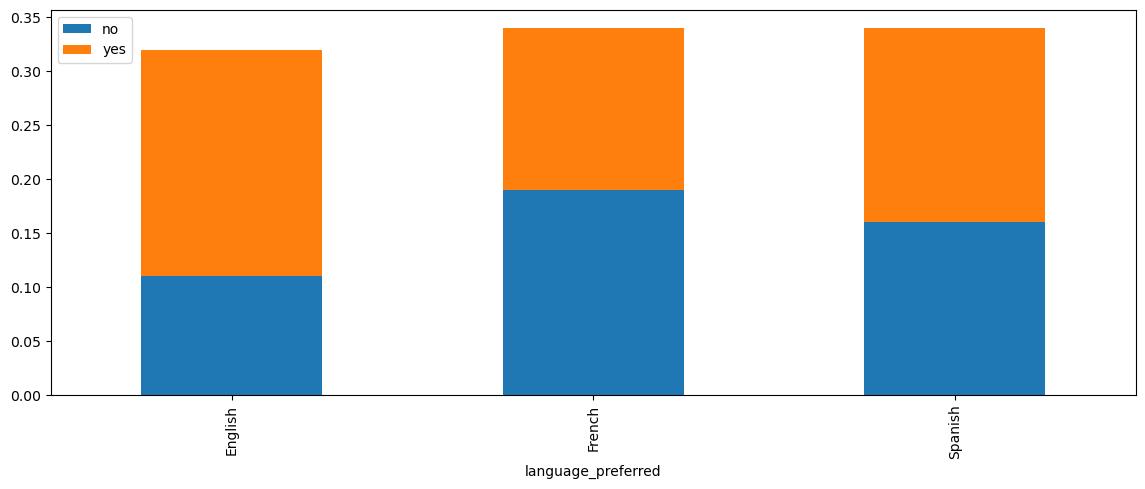

In [28]:
# Constructing contingency table
ax = pd.crosstab(df['language_preferred'], df['converted'], normalize=True).plot(kind='bar', figsize=(14, 5), stacked=True)
ax.legend(loc='upper left')
plt.show()


Findings:

* English-preferring users exhibit a higher conversion rate to subscribers compared to other language preferences.

* While our sample data indicates that English-speaking users have the highest conversion rate, it's uncertain whether this difference is statistically significant. Thus, we can't definitively state that language preference influences subscription conversion.



### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0$: Language preference and conversion to subscriber status are independent of each other

against the alternate hypothesis

>$H_a$: Language preference and conversion to subscriber status are dependent on each other

### Step 2: Select Appropriate test

We'll employ the **Chi-square test of independence** to assess the relationship between two categorical variables: language preference (Spanish/English/French) and conversion status (yes/no).

Assumptions for the Chi-square Test:

* Categorical Variables: Confirmed. Both variables in question are categorical.
* Minimum Expected Frequency: Met. Each category has an expected count of more than 5.
* Random Sampling: Verified. The data has been randomly sampled from the population.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [29]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table


converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [30]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value3, dof, expected = chi2_contingency(contingency_table)

#Round pvalue to 4 significant figures
p_value=round(p_value3,4)

print("Test Statistic =",round(chi,4))
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.093
p-value = 0.213
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [31]:
if p_value < 0.05:
    print(f'Given a p-value of {p_value}, we have sufficient evidence to reject the null hypothesis.')
else:
    print(f'Given a p-value of {p_value}, we fail to reject the null hypothesis.')

Given a p-value of 0.213, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At a significance level of 5%, we don't find compelling evidence to reject the notion that user language preference and their conversion to subscriber status are unrelated.

Hence, we do not have enough statistical evidence to say that user's conversion to subscriber is dependent on language preferred by user

## 4. Is the time spent on the new page same for the different language users?

Let's perform visual analysis

In [32]:
df_new =df[df['landing_page']=='new']

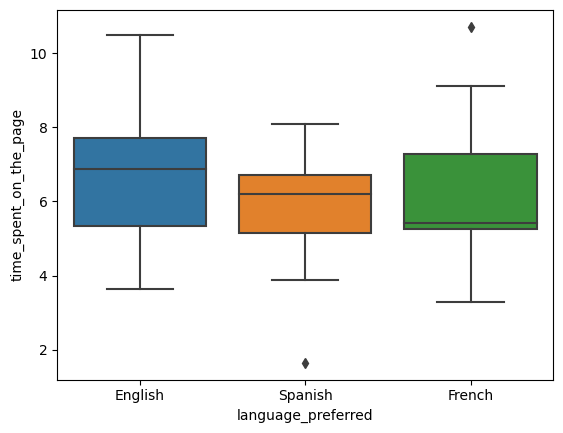

In [33]:
# Box plot showing time spent on the new page for users using different languages
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page');

Findings:

* There's no apparent substantial variation in the time users spend on the NEW landing page based on their language preferences.

* English-speaking users typically have a longer median time on the new page compared to their Spanish and French counterparts. Additionally, their time range on the page is broader.

* Spanish-speaking users, on average, spend between 4 to 8 minutes on the new page, though there's an outlier with notably less time.

* Further analysis is required to determine the statistical significance of these observed patterns and differences

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternate hypothesis

>$H_a$: The average time spent on the new page varies for at least one of the language groups

Where $\mu_1, \mu_2$ and $\mu_3$ are the mean times spent on the new page for users preferring English, French and Spanish respectively

### Step 2: Select Appropriate test

We'll employ the **ONE WAY ANOVA TEST** to assess our formulated hypotheses.

Before diving in, it's crucial to ensure our data meets certain assumptions:

* **Normality**: We'll use the Shapiro-Wilk’s test to verify if our response variable follows a normal distribution.
* **Equality of Variance**: The Levene test will help determine if our response variable has consistent variance across groups.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ mean time spent on the new page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ mean time spent on the new page does not follow normal distribution

In [34]:
# Assumption 1: Checking for Normality
from scipy import stats

# Calculate the p-value using Shapiro-Wilk’s test
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print(f'The p-value for normality is {p_value:.4f}')

The p-value for normality is 0.8040


Inference: Since p-value of the test is larger than 0.05, we fail to reject the null hypothesis that the response follows normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [35]:
# Assumption 2: Checking for Homogeneity of Variance
from scipy.stats import levene

# Group data by language preference
english_time = df_new['time_spent_on_the_page'][df_new['language_preferred'] == "English"]
spanish_time = df_new['time_spent_on_the_page'][df_new['language_preferred'] == "Spanish"]
french_time = df_new['time_spent_on_the_page'][df_new['language_preferred'] == "French"]

# Calculate the p-value using Levene's test
statistic, p_value_variance = levene(english_time, spanish_time, french_time)

print(f'The p-value for homogeneity of variance is {p_value_variance:.4f}')

The p-value for homogeneity of variance is 0.4671


Inference: Since p-value of the test is larger than 0.05, we fail to reject the null hypothesis of variance homogeneity

Assumption Verification:

* Normality of Populations: Confirmed. The normality assumption is validated using the Shapiro-Wilk’s test.

* Independence of Samples: Verified. The samples are independent simple random samples.

* Equality of Population Variances: Established. The homogeneity of variance assumption is confirmed using Levene's test.

Given the satisfaction of these assumptions, we can proceed with the **one-way ANOVA test**.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [36]:
# Separate variables for time spent on the new page by language preference
english = df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page']
spanish = df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page']
french = df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page']


### Step 5: Calculate the p-value

In [37]:
# Import the required function
from scipy.stats import f_oneway

# Calculate the p-value using one-way ANOVA
test_statistic, p_value = f_oneway(english, spanish, french)

# Print the rounded p-value
print(f'The p-value is {p_value:.4f}')


The p-value is 0.4320


### Step 6: Compare the p-value with $\alpha$

In [38]:
if p_value < 0.05:
    print(f'With a p-value of {p_value:.4f}, we have sufficient evidence to reject the null hypothesis.')
else:
    print(f'With a p-value of {p_value:.4f}, we do not have enough evidence to reject the null hypothesis.')

With a p-value of 0.4320, we do not have enough evidence to reject the null hypothesis.


### Step 7:  Draw inference

Given that the p-value is below 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the mean time spent on the new landing page is different for users with different language preferences at the 5% significance level.

## Conclusion and Business Recommendations

Conclusions:
* Users spend an average of 6.2 minutes on the new Landing page, while they spend an average of 4.5 minutes on the old Landing Page.

* There is strong statistical evidence indicating that users spend more time on the new landing page compared to the old landing page.

* The conversion rate to subscribers for users on the new landing page is 66%, whereas it is 42% for the old landing page.

* Statistical evidence supports the claim that the conversion rate for users on the new landing page is higher than for users on the old landing page.

Business Recommendations:
* We recommend adopting the new landing page as the primary landing page for the e-news express service. This change could potentially enhance:
     (1) User engagement, leading to increased ad-clicks and higher ad-revenue.
     (2) Conversion rates to subscriber status, translating into greater revenue for the e-news service.

* The new landing page is suitable for future marketing campaigns designed to attract more users to the e-news service.

* The conversion rate for users who prefer English is higher at 66%, outperforming the other languages.

Considerations:

* Based on the current dataset, there is insufficient statistical evidence to assert that conversion to subscriber status depends on user language preference. Future surveys with larger sample sizes may be needed to explore such a relationship.

* Additionally, there is insufficient statistical evidence to conclude that the average time spent on the new landing page varies significantly among users with different language preferences. Further investigation may be necessary.

___